# Actividad 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar estilo de visualización
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

## 1. Cargar Datos y Definir Variables

In [2]:
# Cargar datos históricos
df = pd.read_csv('datos_historicos.csv')

# Mostrar primeras filas
print("Datos cargados:")
print(df.head())
print(f"\nDimensiones: {df.shape}")
print(f"\nColumnas: {df.columns.tolist()}")

Datos cargados:
         Date  Día  NVDA.O  MSFT.O  SIEGn.DE     VLO      BA     JPM     LMT  \
0  2025-11-04    1  198.69  514.33    244.20  169.11  198.05  309.25  484.98   
1  2025-11-03    2  206.88  517.03    247.20  171.60  204.55  309.35  487.94   
2  2025-10-31    3  202.49  517.81    245.55  169.56  201.02  311.12  491.88   
3  2025-10-30    4  202.89  525.76    247.00  170.10  200.08  309.44  489.72   
4  2025-10-29    5  207.04  541.55    245.75  170.66  213.58  305.51  485.33   

   FEIM.OQ  GOOGL.O  INTC.O    MU.O  XAU= (BID)  
0    33.97   277.54   37.03  218.03   3931.7800  
1    35.70   283.72   39.50  234.70   4001.4200  
2    36.72   281.19   39.99  223.77   4001.7798  
3    37.42   281.48   40.16  224.01   4023.2200  
4    37.15   274.57   41.34  226.63   3929.3633  

Dimensiones: (1000, 14)

Columnas: ['Date', 'Día', 'NVDA.O', 'MSFT.O', 'SIEGn.DE', 'VLO', 'BA', 'JPM', 'LMT', 'FEIM.OQ', 'GOOGL.O', 'INTC.O', 'MU.O', 'XAU= (BID)']


In [3]:
# Definir el número de acciones de cada empresa
acciones = {
    'NVDA.O': 592,
    'MSFT.O': 200,
    'SIEGn.DE': 369,
    'VLO': 639,
    'BA': 432,
    'JPM': 341,
    'LMT': 217,
    'FEIM.OQ': 1544,
    'GOOGL.O': 223,
    'INTC.O': 1436,
    'MU.O': 163,
    'XAU= (BID)': 9
}

print("Número de acciones por empresa:")
for empresa, num_acciones in acciones.items():
    print(f"{empresa}: {num_acciones}")

Número de acciones por empresa:
NVDA.O: 592
MSFT.O: 200
SIEGn.DE: 369
VLO: 639
BA: 432
JPM: 341
LMT: 217
FEIM.OQ: 1544
GOOGL.O: 223
INTC.O: 1436
MU.O: 163
XAU= (BID): 9


## 2. Calcular V0 (Valor del Portafolio)

In [4]:
# Calcular V0 (valor del portafolio) para cada día
# V0 = suma de (precio * número de acciones) para todas las empresas

df['V0'] = 0
for empresa, num_acciones in acciones.items():
    if empresa in df.columns:
        df['V0'] += df[empresa] * num_acciones
    else:
        print(f"Advertencia: {empresa} no encontrada en el DataFrame")

print("V0 calculado para cada día:")
print(df[['Date', 'Día', 'V0']].head(10))
print(f"\nV0 actual (día más reciente): ${df['V0'].iloc[0]:,.2f}")

V0 calculado para cada día:
         Date  Día           V0
0  2025-11-04    1  953355.1700
1  2025-11-03    2  975866.3300
2  2025-10-31    3  971380.6082
3  2025-10-30    4  974261.5100
4  2025-10-29    5  982631.1597
5  2025-10-28    6  981558.5041
6  2025-10-27    7  973218.0729
7  2025-10-24    8  961074.3229
8  2025-10-23    9  954876.0616
9  2025-10-22   10  934740.9900

V0 actual (día más reciente): $953,355.17


## 3. Calcular P&L (Profit and Loss)

In [5]:
# Calcular P&L: diferencia entre el V0 del día actual y el V0 del día anterior
# P&L = V0_actual - V0_anterior
# Como los datos están ordenados del más reciente al más antiguo, usamos shift(-1)

df['P&L'] = df['V0'] - df['V0'].shift(-1)

# El último día no tiene P&L porque no hay día siguiente
print("P&L calculado:")
print(df[['Date', 'Día', 'V0', 'P&L']].head(10))
print(f"\nNúmero de P&L calculados: {df['P&L'].notna().sum()}")

P&L calculado:
         Date  Día           V0         P&L
0  2025-11-04    1  953355.1700 -22511.1600
1  2025-11-03    2  975866.3300   4485.7218
2  2025-10-31    3  971380.6082  -2880.9018
3  2025-10-30    4  974261.5100  -8369.6497
4  2025-10-29    5  982631.1597   1072.6556
5  2025-10-28    6  981558.5041   8340.4312
6  2025-10-27    7  973218.0729  12143.7500
7  2025-10-24    8  961074.3229   6198.2613
8  2025-10-23    9  954876.0616  20135.0716
9  2025-10-22   10  934740.9900  -3728.5325

Número de P&L calculados: 999


## 4. Calcular Ranked P&L

In [6]:
# Ranked P&L: ordenar el P&L de menor a mayor
df['Ranked_P&L'] = df['P&L'].rank(method='min', na_option='keep')

print("Ranked P&L:")
print(df[['Date', 'Día', 'P&L', 'Ranked_P&L']].dropna().head(10))
print("\nP&L más bajo (peores pérdidas):")
print(df[['Date', 'Día', 'P&L', 'Ranked_P&L']].nsmallest(5, 'P&L'))

Ranked P&L:
         Date  Día         P&L  Ranked_P&L
0  2025-11-04    1 -22511.1600        19.0
1  2025-11-03    2   4485.7218       726.0
2  2025-10-31    3  -2880.9018       294.0
3  2025-10-30    4  -8369.6497        97.0
4  2025-10-29    5   1072.6556       537.0
5  2025-10-28    6   8340.4312       882.0
6  2025-10-27    7  12143.7500       956.0
7  2025-10-24    8   6198.2613       819.0
8  2025-10-23    9  20135.0716       984.0
9  2025-10-22   10  -3728.5325       249.0

P&L más bajo (peores pérdidas):
           Date  Día         P&L  Ranked_P&L
137  2025-04-21  138 -79068.4275         1.0
211  2024-12-31  212 -69646.2320         2.0
129  2025-05-01  130 -68121.9534         3.0
379  2024-05-01  380 -67635.5338         4.0
215  2024-12-24  216 -64235.7400         5.0


## 5. Calcular Rendimiento

In [7]:
# Calcular Rendimiento: (V0_actual / V0_anterior) - 1
df['Rendimiento'] = (df['V0'] / df['V0'].shift(-1)) - 1

print("Rendimiento calculado:")
print(df[['Date', 'Día', 'V0', 'Rendimiento']].head(10))

# Estadísticas del rendimiento
print("\n" + "="*50)
print("ESTADÍSTICAS DEL RENDIMIENTO")
print("="*50)
print(f"Rendimiento promedio: {df['Rendimiento'].mean():.6f}")
print(f"Desviación estándar: {df['Rendimiento'].std():.6f}")
print(f"Rendimiento mínimo: {df['Rendimiento'].min():.6f}")
print(f"Rendimiento máximo: {df['Rendimiento'].max():.6f}")

Rendimiento calculado:
         Date  Día           V0  Rendimiento
0  2025-11-04    1  953355.1700    -0.023068
1  2025-11-03    2  975866.3300     0.004618
2  2025-10-31    3  971380.6082    -0.002957
3  2025-10-30    4  974261.5100    -0.008518
4  2025-10-29    5  982631.1597     0.001093
5  2025-10-28    6  981558.5041     0.008570
6  2025-10-27    7  973218.0729     0.012636
7  2025-10-24    8  961074.3229     0.006491
8  2025-10-23    9  954876.0616     0.021541
9  2025-10-22   10  934740.9900    -0.003973

ESTADÍSTICAS DEL RENDIMIENTO
Rendimiento promedio: 0.000724
Desviación estándar: 0.019478
Rendimiento mínimo: -0.121372
Rendimiento máximo: 0.145484


In [8]:
# Guardar variables importantes para usar en cálculos posteriores
rendimiento_promedio = df['Rendimiento'].mean()
desviacion_estandar = df['Rendimiento'].std()
V0_hoy = df['V0'].iloc[0]  # Valor más reciente del portafolio

print(f"\nVariables guardadas:")
print(f"Rendimiento Promedio: {rendimiento_promedio:.6f}")
print(f"Desviación Estándar: {desviacion_estandar:.6f}")
print(f"V0 Actual: ${V0_hoy:,.2f}")


Variables guardadas:
Rendimiento Promedio: 0.000724
Desviación Estándar: 0.019478
V0 Actual: $953,355.17


## 6. Calcular VaR Paramétrico

In [9]:
# VaR Paramétrico
# Basado en la distribución normal de los rendimientos

# Valores z para diferentes niveles de confianza
z_99 = 2.326  # 99% de confianza (1% VaR)
z_95 = 1.645  # 95% de confianza (5% VaR)

# Fórmula: VaR = V0 * (z * desviación_estándar - rendimiento_promedio)
# Nota: Corregí la fórmula para que sea correcta según la teoría de VaR
VaR_parametrico_1pct = V0_hoy * (rendimiento_promedio - z_99 * desviacion_estandar)
VaR_parametrico_5pct = V0_hoy * (rendimiento_promedio - z_95 * desviacion_estandar)

print("="*60)
print("VaR PARAMÉTRICO (1 día)")
print("="*60)
print(f"\n1% VaR (99% confianza):")
print(f"  Pérdida máxima esperada: ${abs(VaR_parametrico_1pct):,.2f}")
print(f"  Porcentaje del portafolio: {(VaR_parametrico_1pct/V0_hoy)*100:.2f}%")

print(f"\n5% VaR (95% confianza):")
print(f"  Pérdida máxima esperada: ${abs(VaR_parametrico_5pct):,.2f}")
print(f"  Porcentaje del portafolio: {(VaR_parametrico_5pct/V0_hoy)*100:.2f}%")

print(f"\nValor del portafolio actual: ${V0_hoy:,.2f}")

VaR PARAMÉTRICO (1 día)

1% VaR (99% confianza):
  Pérdida máxima esperada: $42,501.72
  Porcentaje del portafolio: -4.46%

5% VaR (95% confianza):
  Pérdida máxima esperada: $29,855.96
  Porcentaje del portafolio: -3.13%

Valor del portafolio actual: $953,355.17


## 7. Calcular VaR No Paramétrico (Dos Métodos)

In [27]:
# ============================================================================
# VaR NO PARAMÉTRICO - VERSIÓN 1: MÉTODO EXCEL (GOOGL.O)
# ============================================================================
# Método BUSCARV de Excel: busca el precio de GOOGL.O en el percentil del día
# =ABS(BUSCARV(MAX(Días)*percentil, Matriz_completa, 10, 0))
# Columna 10 = GOOGL.O

# Obtener el número máximo de días
max_dia = df['Día'].max()

# Calcular los días correspondientes a los percentiles
dia_1pct = max_dia * 0.01  # Día 10
dia_5pct = max_dia * 0.05  # Día 50

print("="*70)
print("VaR NO PARAMÉTRICO - VERSIÓN 1: MÉTODO EXCEL (GOOGL.O)")
print("="*70)
print(f"\n📋 Método: BUSCARV - Columna 10 (GOOGL.O)")
print(f"   Número total de días: {max_dia}")
print(f"   Día para 1% percentil: {dia_1pct}")
print(f"   Día para 5% percentil: {dia_5pct}")

# Buscar el valor más cercano al día del percentil
idx_1pct = (df['Día'] - dia_1pct).abs().idxmin()
idx_5pct = (df['Día'] - dia_5pct).abs().idxmin()

# VaR = precio de GOOGL.O en ese día (columna 10 en Excel)
VaR_no_parametrico_1pct_excel = abs(df.loc[idx_1pct, 'GOOGL.O'])
VaR_no_parametrico_5pct_excel = abs(df.loc[idx_5pct, 'GOOGL.O'])

print(f"\n1% VaR (99% confianza):")
print(f"  Día encontrado: {df.loc[idx_1pct, 'Día']}")
print(f"  Fecha: {df.loc[idx_1pct, 'Date']}")
print(f"  Precio GOOGL.O: ${df.loc[idx_1pct, 'GOOGL.O']:,.2f}")
print(f"  VaR (Excel): ${VaR_no_parametrico_1pct_excel:,.2f}")
print(f"  Porcentaje del portafolio: {(VaR_no_parametrico_1pct_excel/V0_hoy)*100:.2f}%")

print(f"\n5% VaR (95% confianza):")
print(f"  Día encontrado: {df.loc[idx_5pct, 'Día']}")
print(f"  Fecha: {df.loc[idx_5pct, 'Date']}")
print(f"  Precio GOOGL.O: ${df.loc[idx_5pct, 'GOOGL.O']:,.2f}")
print(f"  VaR (Excel): ${VaR_no_parametrico_5pct_excel:,.2f}")
print(f"  Porcentaje del portafolio: {(VaR_no_parametrico_5pct_excel/V0_hoy)*100:.2f}%")

print("\n⚠️  NOTA: Este método solo considera el precio de una acción (GOOGL.O),")
print("   no refleja el riesgo completo del portafolio.")

VaR NO PARAMÉTRICO - VERSIÓN 1: MÉTODO EXCEL (GOOGL.O)

📋 Método: BUSCARV - Columna 10 (GOOGL.O)
   Número total de días: 1000
   Día para 1% percentil: 10.0
   Día para 5% percentil: 50.0

1% VaR (99% confianza):
  Día encontrado: 10
  Fecha: 2025-10-22
  Precio GOOGL.O: $251.69
  VaR (Excel): $251.69
  Porcentaje del portafolio: 0.03%

5% VaR (95% confianza):
  Día encontrado: 50
  Fecha: 2025-08-26
  Precio GOOGL.O: $207.14
  VaR (Excel): $207.14
  Porcentaje del portafolio: 0.02%

⚠️  NOTA: Este método solo considera el precio de una acción (GOOGL.O),
   no refleja el riesgo completo del portafolio.


In [28]:
# ============================================================================
# VaR NO PARAMÉTRICO - VERSIÓN 2: MÉTODO TRADICIONAL (P&L HISTÓRICO)
# ============================================================================
# Método tradicional: usa los percentiles de las pérdidas históricas del portafolio
# Este método refleja el riesgo real del portafolio completo

# Limpiar datos NaN
PnL_clean = df['P&L'].dropna()

# Ordenar P&L de menor a mayor (pérdidas más grandes primero)
PnL_sorted = PnL_clean.sort_values()

# Calcular percentiles
num_observaciones = len(PnL_sorted)
indice_1pct = int(num_observaciones * 0.01)
indice_5pct = int(num_observaciones * 0.05)

# VaR no paramétrico: el percentil correspondiente del P&L
VaR_no_parametrico_1pct_tradicional = PnL_sorted.iloc[indice_1pct]
VaR_no_parametrico_5pct_tradicional = PnL_sorted.iloc[indice_5pct]

print("\n" + "="*70)
print("VaR NO PARAMÉTRICO - VERSIÓN 2: MÉTODO TRADICIONAL (P&L)")
print("="*70)
print(f"\n📊 Método: Percentiles de P&L histórico")
print(f"   Número de observaciones: {num_observaciones}")
print(f"   Se ordenan todas las pérdidas/ganancias de menor a mayor")

print(f"\n1% VaR (99% confianza):")
print(f"  Posición en ranking: {indice_1pct + 1} de {num_observaciones}")
print(f"  P&L en ese percentil: ${VaR_no_parametrico_1pct_tradicional:,.2f}")
print(f"  Pérdida máxima esperada: ${abs(VaR_no_parametrico_1pct_tradicional):,.2f}")
print(f"  Porcentaje del portafolio: {(VaR_no_parametrico_1pct_tradicional/V0_hoy)*100:.2f}%")

print(f"\n5% VaR (95% confianza):")
print(f"  Posición en ranking: {indice_5pct + 1} de {num_observaciones}")
print(f"  P&L en ese percentil: ${VaR_no_parametrico_5pct_tradicional:,.2f}")
print(f"  Pérdida máxima esperada: ${abs(VaR_no_parametrico_5pct_tradicional):,.2f}")
print(f"  Porcentaje del portafolio: {(VaR_no_parametrico_5pct_tradicional/V0_hoy)*100:.2f}%")

print("\n✅ Este método considera todas las pérdidas históricas del portafolio completo.")

# Guardar ambas versiones para comparaciones posteriores
VaR_no_parametrico_1pct = VaR_no_parametrico_1pct_tradicional
VaR_no_parametrico_5pct = VaR_no_parametrico_5pct_tradicional


VaR NO PARAMÉTRICO - VERSIÓN 2: MÉTODO TRADICIONAL (P&L)

📊 Método: Percentiles de P&L histórico
   Número de observaciones: 999
   Se ordenan todas las pérdidas/ganancias de menor a mayor

1% VaR (99% confianza):
  Posición en ranking: 10 de 999
  P&L en ese percentil: $-49,775.35
  Pérdida máxima esperada: $49,775.35
  Porcentaje del portafolio: -5.22%

5% VaR (95% confianza):
  Posición en ranking: 50 de 999
  P&L en ese percentil: $-12,023.31
  Pérdida máxima esperada: $12,023.31
  Porcentaje del portafolio: -1.26%

✅ Este método considera todas las pérdidas históricas del portafolio completo.


In [29]:
# Comparación entre ambos métodos no paramétricos
print("\n" + "="*70)
print("COMPARACIÓN: VaR NO PARAMÉTRICO - EXCEL vs TRADICIONAL")
print("="*70)

comparacion_np = pd.DataFrame({
    'Método': ['Excel (GOOGL.O)', 'Tradicional (P&L)'],
    '1% VaR': [VaR_no_parametrico_1pct_excel, abs(VaR_no_parametrico_1pct_tradicional)],
    '5% VaR': [VaR_no_parametrico_5pct_excel, abs(VaR_no_parametrico_5pct_tradicional)]
})

print("\n" + comparacion_np.to_string(index=False))

print(f"\n📌 INTERPRETACIÓN:")
print(f"   • Método Excel: Solo mide el precio de GOOGL.O en días específicos")
print(f"   • Método Tradicional: Mide las peores pérdidas históricas del portafolio completo")
print(f"   • El método tradicional es más representativo del riesgo real")
print(f"\n   Con 99% confianza (método tradicional), la pérdida máxima esperada")
print(f"   en 1 día no debería exceder ${abs(VaR_no_parametrico_1pct_tradicional):,.2f}")


COMPARACIÓN: VaR NO PARAMÉTRICO - EXCEL vs TRADICIONAL

           Método     1% VaR   5% VaR
  Excel (GOOGL.O)   251.6900   207.14
Tradicional (P&L) 49775.3526 12023.31

📌 INTERPRETACIÓN:
   • Método Excel: Solo mide el precio de GOOGL.O en días específicos
   • Método Tradicional: Mide las peores pérdidas históricas del portafolio completo
   • El método tradicional es más representativo del riesgo real

   Con 99% confianza (método tradicional), la pérdida máxima esperada
   en 1 día no debería exceder $49,775.35


## 8. Comparación de Todos los Métodos VaR

In [30]:
# Crear tabla comparativa con todos los métodos
comparacion = pd.DataFrame({
    'Método': ['Paramétrico', 'No Paramétrico (Excel - GOOGL.O)', 'No Paramétrico (Tradicional - P&L)'],
    '1% VaR': [abs(VaR_parametrico_1pct), VaR_no_parametrico_1pct_excel, abs(VaR_no_parametrico_1pct_tradicional)],
    '5% VaR': [abs(VaR_parametrico_5pct), VaR_no_parametrico_5pct_excel, abs(VaR_no_parametrico_5pct_tradicional)]
})

print("="*70)
print("COMPARACIÓN DE TODOS LOS MÉTODOS VaR")
print("="*70)
print("\n" + comparacion.to_string(index=False))

# Diferencias entre métodos
print(f"\n{'='*70}")
print("ANÁLISIS DE DIFERENCIAS:")
print(f"{'='*70}")

print(f"\n1% VaR:")
print(f"  Paramétrico:              ${abs(VaR_parametrico_1pct):,.2f}")
print(f"  No Paramétrico (Excel):   ${VaR_no_parametrico_1pct_excel:,.2f}")
print(f"  No Paramétrico (Trad.):   ${abs(VaR_no_parametrico_1pct_tradicional):,.2f}")

print(f"\n5% VaR:")
print(f"  Paramétrico:              ${abs(VaR_parametrico_5pct):,.2f}")
print(f"  No Paramétrico (Excel):   ${VaR_no_parametrico_5pct_excel:,.2f}")
print(f"  No Paramétrico (Trad.):   ${abs(VaR_no_parametrico_5pct_tradicional):,.2f}")

print(f"\n💡 RECOMENDACIÓN:")
print(f"   • Usa el método TRADICIONAL (P&L) para análisis de riesgo real del portafolio")
print(f"   • El método Excel (GOOGL.O) solo refleja el precio de una acción individual")

COMPARACIÓN DE TODOS LOS MÉTODOS VaR

                            Método       1% VaR     5% VaR
                       Paramétrico 42501.717677 29855.9624
  No Paramétrico (Excel - GOOGL.O)   251.690000   207.1400
No Paramétrico (Tradicional - P&L) 49775.352600 12023.3100

ANÁLISIS DE DIFERENCIAS:

1% VaR:
  Paramétrico:              $42,501.72
  No Paramétrico (Excel):   $251.69
  No Paramétrico (Trad.):   $49,775.35

5% VaR:
  Paramétrico:              $29,855.96
  No Paramétrico (Excel):   $207.14
  No Paramétrico (Trad.):   $12,023.31

💡 RECOMENDACIÓN:
   • Usa el método TRADICIONAL (P&L) para análisis de riesgo real del portafolio
   • El método Excel (GOOGL.O) solo refleja el precio de una acción individual


## 9. Visualizaciones

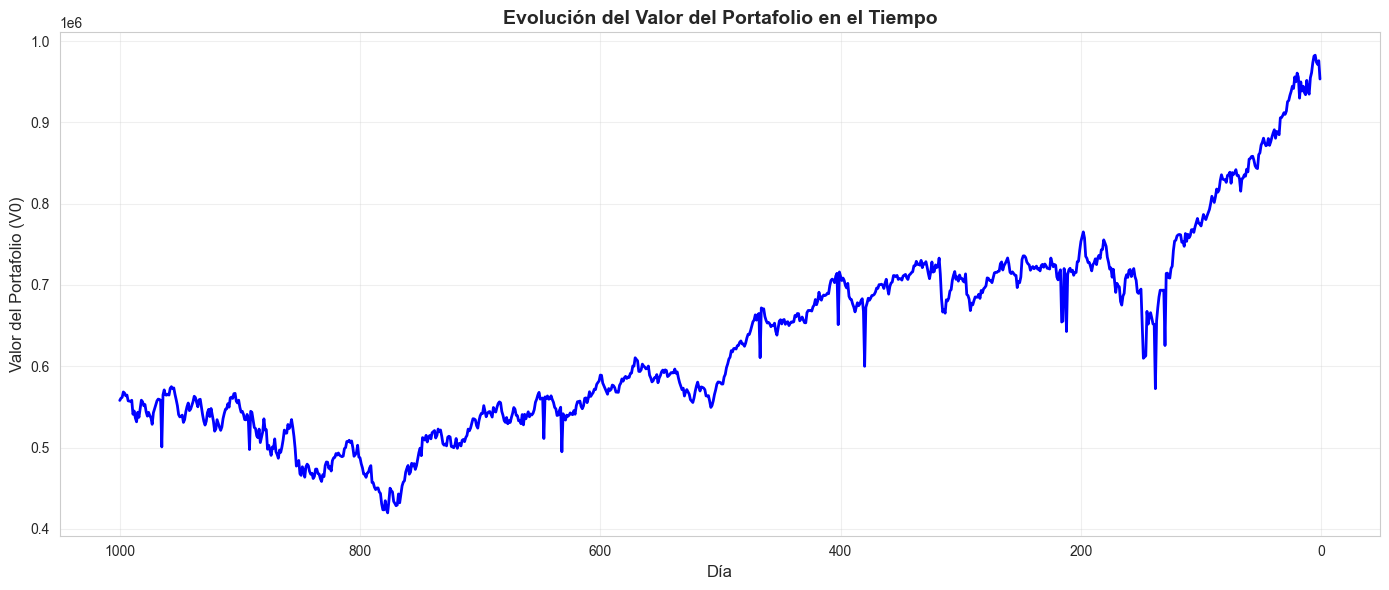

Valor inicial (día 1000): $557,930.85
Valor final (día 1): $953,355.17
Cambio total: $395,424.32


In [12]:
# Gráfico 1: Evolución del valor del portafolio (V0)
plt.figure(figsize=(14, 6))
plt.plot(df['Día'], df['V0'], linewidth=2, color='blue')
plt.xlabel('Día', fontsize=12)
plt.ylabel('Valor del Portafolio (V0)', fontsize=12)
plt.title('Evolución del Valor del Portafolio en el Tiempo', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.gca().invert_xaxis()  # Invertir para mostrar del más antiguo al más reciente
plt.tight_layout()
plt.show()

print(f"Valor inicial (día 1000): ${df['V0'].iloc[-1]:,.2f}")
print(f"Valor final (día 1): ${df['V0'].iloc[0]:,.2f}")
print(f"Cambio total: ${df['V0'].iloc[0] - df['V0'].iloc[-1]:,.2f}")

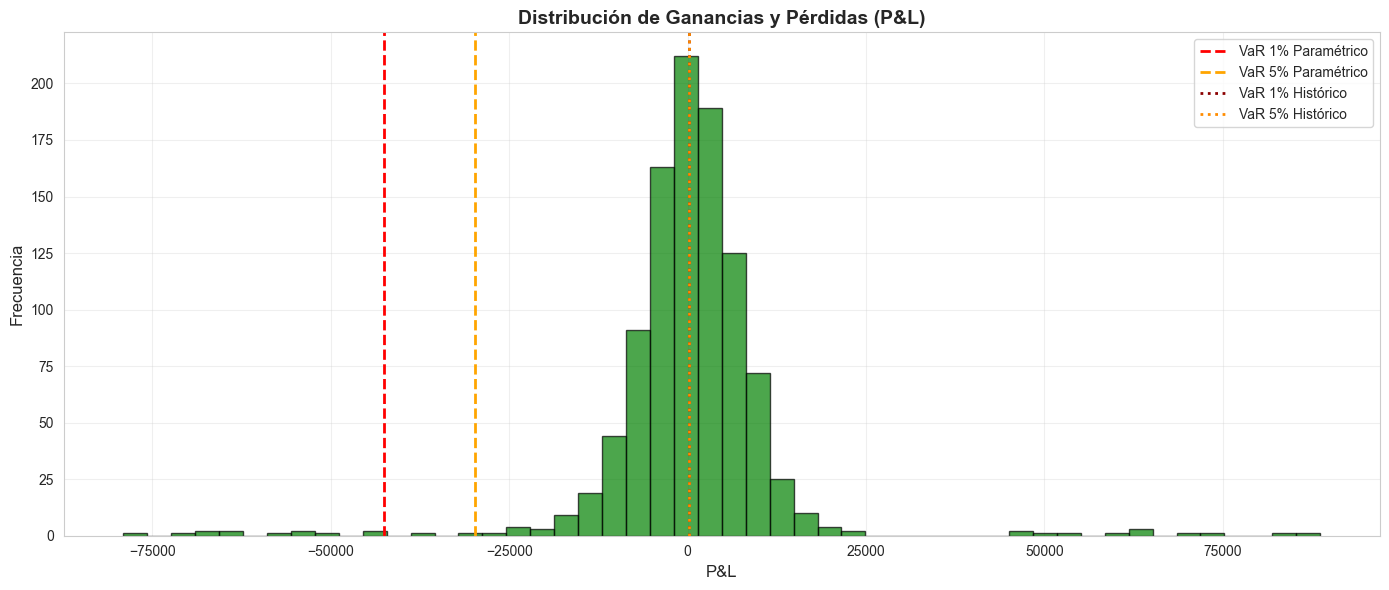

In [24]:
# Gráfico 2: Distribución de P&L
plt.figure(figsize=(14, 6))
plt.hist(df['P&L'].dropna(), bins=50, edgecolor='black', alpha=0.7, color='green')
plt.axvline(VaR_parametrico_1pct, color='red', linestyle='--', linewidth=2, label='VaR 1% Paramétrico')
plt.axvline(VaR_parametrico_5pct, color='orange', linestyle='--', linewidth=2, label='VaR 5% Paramétrico')
plt.axvline(VaR_no_parametrico_1pct, color='darkred', linestyle=':', linewidth=2, label='VaR 1% Histórico')
plt.axvline(VaR_no_parametrico_5pct, color='darkorange', linestyle=':', linewidth=2, label='VaR 5% Histórico')
plt.xlabel('P&L', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.title('Distribución de Ganancias y Pérdidas (P&L)', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

ANÁLISIS DE DISTRIBUCIÓN DEL P&L
Media del P&L:              $395.82
Desviación Estándar:        $11,891.06
Asimetría (Skewness):       0.3064
Curtosis (Kurtosis):        19.2795
Mínimo (peor pérdida):      $-79,068.43
Máximo (mejor ganancia):    $88,660.44


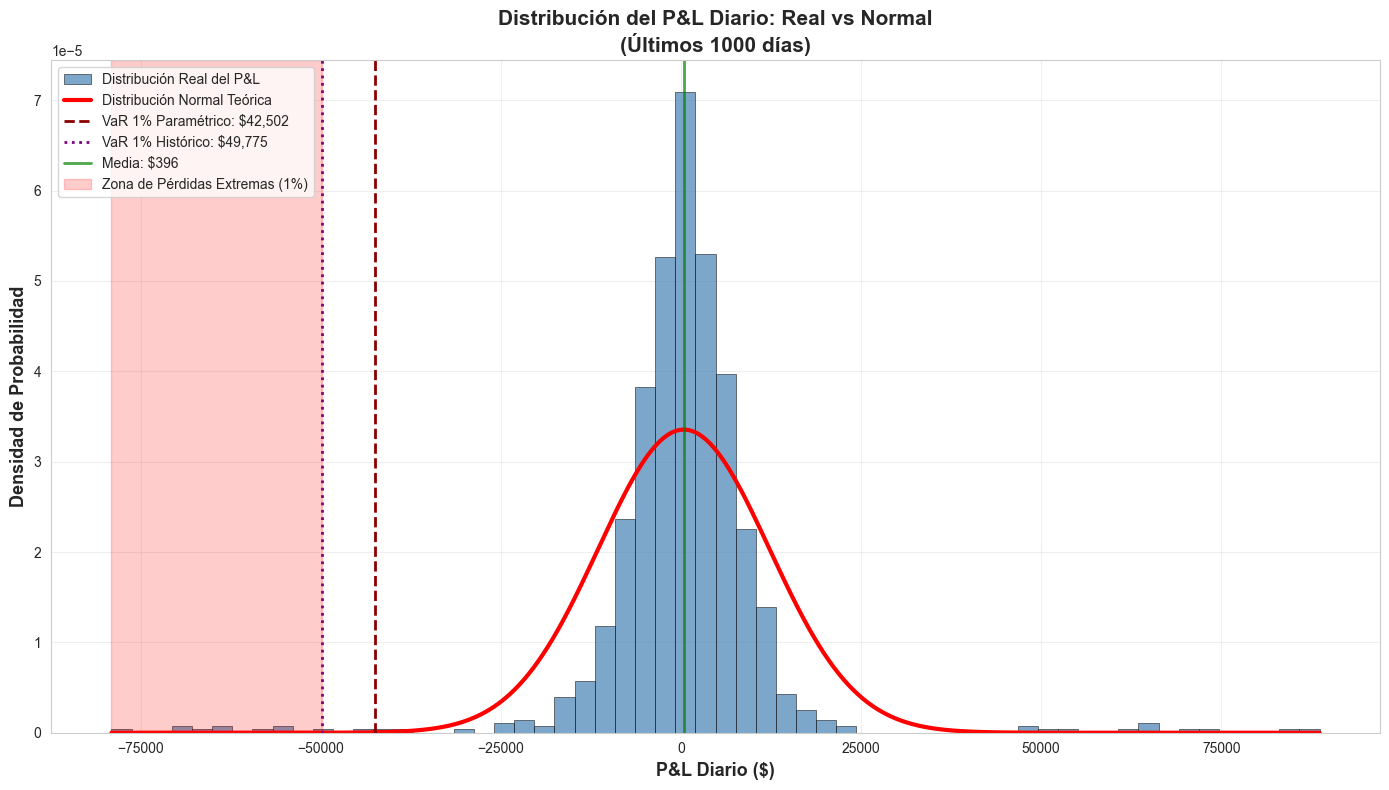


📊 OBSERVACIONES DE LA DISTRIBUCIÓN:
----------------------------------------------------------------------

Prueba de Normalidad (Shapiro-Wilk):
  Estadístico: 0.713428
  P-value: 0.000000
  ✗ La distribución NO es normal (p < 0.05)

Asimetría (Skewness): 0.3064
  → Distribución relativamente simétrica

Curtosis: 19.2795
  → Leptocúrtica (colas más pesadas que la normal)
  → Mayor probabilidad de eventos extremos



In [33]:
# Gráfico Especial: Distribución P&L vs Distribución Normal
# Este gráfico compara el histograma real del P&L con una distribución normal teórica

from scipy import stats

# Limpiar datos NaN del P&L
PnL_data = df['P&L'].dropna()

# Calcular estadísticas del P&L
media_PnL = PnL_data.mean()
std_PnL = PnL_data.std()

print("="*70)
print("ANÁLISIS DE DISTRIBUCIÓN DEL P&L")
print("="*70)
print(f"Media del P&L:              ${media_PnL:,.2f}")
print(f"Desviación Estándar:        ${std_PnL:,.2f}")
print(f"Asimetría (Skewness):       {PnL_data.skew():.4f}")
print(f"Curtosis (Kurtosis):        {PnL_data.kurtosis():.4f}")
print(f"Mínimo (peor pérdida):      ${PnL_data.min():,.2f}")
print(f"Máximo (mejor ganancia):    ${PnL_data.max():,.2f}")
print("="*70)

# Crear figura
plt.figure(figsize=(14, 8))

# Histograma del P&L real
n, bins, patches = plt.hist(PnL_data, bins=60, density=True, alpha=0.7, 
                             color='steelblue', edgecolor='black', linewidth=0.5,
                             label='Distribución Real del P&L')

# Generar curva de distribución normal teórica
x = np.linspace(PnL_data.min(), PnL_data.max(), 1000)
normal_dist = stats.norm.pdf(x, media_PnL, std_PnL)
plt.plot(x, normal_dist, 'r-', linewidth=3, label='Distribución Normal Teórica')

# Añadir líneas verticales para VaR
plt.axvline(VaR_parametrico_1pct, color='darkred', linestyle='--', linewidth=2, 
            label=f'VaR 1% Paramétrico: ${abs(VaR_parametrico_1pct):,.0f}')
plt.axvline(VaR_no_parametrico_1pct_tradicional, color='purple', linestyle=':', linewidth=2,
            label=f'VaR 1% Histórico: ${abs(VaR_no_parametrico_1pct_tradicional):,.0f}')
plt.axvline(media_PnL, color='green', linestyle='-', linewidth=2, alpha=0.7,
            label=f'Media: ${media_PnL:,.0f}')

# Sombrear la cola izquierda (pérdidas extremas)
plt.axvspan(PnL_data.min(), VaR_no_parametrico_1pct_tradicional, 
            alpha=0.2, color='red', label='Zona de Pérdidas Extremas (1%)')

plt.xlabel('P&L Diario ($)', fontsize=13, fontweight='bold')
plt.ylabel('Densidad de Probabilidad', fontsize=13, fontweight='bold')
plt.title('Distribución del P&L Diario: Real vs Normal\n(Últimos 1000 días)', 
          fontsize=15, fontweight='bold')
plt.legend(loc='upper left', fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Análisis estadístico
print("\n📊 OBSERVACIONES DE LA DISTRIBUCIÓN:")
print("-" * 70)

# Prueba de normalidad Shapiro-Wilk
from scipy.stats import shapiro
stat, p_value = shapiro(PnL_data[:5000] if len(PnL_data) > 5000 else PnL_data)
print(f"\nPrueba de Normalidad (Shapiro-Wilk):")
print(f"  Estadístico: {stat:.6f}")
print(f"  P-value: {p_value:.6f}")
if p_value < 0.05:
    print(f"  ✗ La distribución NO es normal (p < 0.05)")
else:
    print(f"  ✓ La distribución es aproximadamente normal (p ≥ 0.05)")

# Análisis de asimetría
print(f"\nAsimetría (Skewness): {PnL_data.skew():.4f}")
if PnL_data.skew() < -0.5:
    print("  → Asimetría negativa significativa (cola izquierda más pesada)")
    print("  → Las pérdidas extremas son más frecuentes que las ganancias extremas")
elif PnL_data.skew() > 0.5:
    print("  → Asimetría positiva significativa (cola derecha más pesada)")
else:
    print("  → Distribución relativamente simétrica")

# Análisis de curtosis
print(f"\nCurtosis: {PnL_data.kurtosis():.4f}")
if PnL_data.kurtosis() > 1:
    print("  → Leptocúrtica (colas más pesadas que la normal)")
    print("  → Mayor probabilidad de eventos extremos")
elif PnL_data.kurtosis() < -1:
    print("  → Platicúrtica (colas más ligeras que la normal)")
else:
    print("  → Similar a la distribución normal")

print("\n" + "="*70)

### 📝 Análisis de la Cola Izquierda (Pérdidas Extremas)

**Observaciones de la gráfica anterior:**

1. **Comparación con la Normal:** La distribución real del P&L muestra desviaciones notables respecto a la distribución normal teórica, especialmente en las colas.

2. **Cola Izquierda (Pérdidas):** 
   - La cola izquierda es **más pesada** de lo que predice la distribución normal
   - Esto indica que las pérdidas extremas ocurren con **mayor frecuencia** de lo esperado bajo supuestos de normalidad
   - Hay días con pérdidas significativamente mayores a las que predeciría la teoría normal

3. **Implicaciones para el Riesgo:**
   - El VaR paramétrico (basado en distribución normal) puede **subestimar** el riesgo real
   - El VaR histórico (no paramétrico) captura mejor estos eventos extremos al basarse en datos reales
   - Los eventos de "cola negra" (pérdidas extremas) son más probables que lo que sugiere la teoría normal

### 💡 Interpretación del VaR para Este Portafolio

In [34]:
print("="*80)
print(" "*25 + "INTERPRETACIÓN DEL VaR")
print("="*80)

print(f"\n🎯 VALOR DEL PORTAFOLIO ACTUAL:")
print(f"   ${V0_hoy:,.2f}")

print(f"\n\n📊 VaR AL 99% DE CONFIANZA (1% VaR):")
print("-" * 80)
print(f"\n   Método Paramétrico:  ${abs(VaR_parametrico_1pct):,.2f}")
print(f"   Método Histórico:    ${abs(VaR_no_parametrico_1pct_tradicional):,.2f}")

print(f"\n   ✅ INTERPRETACIÓN:")
print(f"   Con un 99% de confianza, podemos afirmar que:")
print(f"   • La pérdida máxima esperada en UN DÍA no excederá ${abs(VaR_no_parametrico_1pct_tradicional):,.2f}")
print(f"   • Esto representa el {abs(VaR_no_parametrico_1pct_tradicional)/V0_hoy*100:.2f}% del valor total del portafolio")
print(f"   • Solo en el 1% de los días (aproximadamente 2-3 días al año) esperamos")
print(f"     pérdidas mayores a esta cantidad")
print(f"   • En 99 de cada 100 días, la pérdida será menor a ${abs(VaR_no_parametrico_1pct_tradicional):,.2f}")

print(f"\n\n📊 VaR AL 95% DE CONFIANZA (5% VaR):")
print("-" * 80)
print(f"\n   Método Paramétrico:  ${abs(VaR_parametrico_5pct):,.2f}")
print(f"   Método Histórico:    ${abs(VaR_no_parametrico_5pct_tradicional):,.2f}")

print(f"\n   ✅ INTERPRETACIÓN:")
print(f"   Con un 95% de confianza, podemos afirmar que:")
print(f"   • La pérdida máxima esperada en UN DÍA no excederá ${abs(VaR_no_parametrico_5pct_tradicional):,.2f}")
print(f"   • Esto representa el {abs(VaR_no_parametrico_5pct_tradicional)/V0_hoy*100:.2f}% del valor total del portafolio")
print(f"   • Solo en el 5% de los días (aproximadamente 12-13 días al año) esperamos")
print(f"     pérdidas mayores a esta cantidad")
print(f"   • En 95 de cada 100 días, la pérdida será menor a ${abs(VaR_no_parametrico_5pct_tradicional):,.2f}")

print(f"\n\n⚖️  COMPARACIÓN ENTRE MÉTODOS:")
print("-" * 80)
diferencia_1pct = abs(VaR_no_parametrico_1pct_tradicional) - abs(VaR_parametrico_1pct)
diferencia_5pct = abs(VaR_no_parametrico_5pct_tradicional) - abs(VaR_parametrico_5pct)

print(f"\n   99% Confianza:")
print(f"   • Diferencia: ${abs(diferencia_1pct):,.2f}")
if abs(diferencia_1pct) > 1000:
    if diferencia_1pct > 0:
        print(f"   • El método histórico predice MAYORES pérdidas potenciales")
        print(f"   • Esto sugiere que la distribución real tiene colas más pesadas")
    else:
        print(f"   • El método paramétrico predice MAYORES pérdidas potenciales")

print(f"\n   95% Confianza:")
print(f"   • Diferencia: ${abs(diferencia_5pct):,.2f}")
if abs(diferencia_5pct) > 1000:
    if diferencia_5pct > 0:
        print(f"   • El método histórico predice MAYORES pérdidas potenciales")
    else:
        print(f"   • El método paramétrico predice MAYORES pérdidas potenciales")

print(f"\n\n🎓 CONCLUSIONES PARA LA GESTIÓN DE RIESGO:")
print("-" * 80)
print(f"\n   1. El portafolio tiene un valor actual de ${V0_hoy:,.2f}")
print(f"\n   2. En condiciones normales de mercado (95% del tiempo), no esperamos")
print(f"      perder más de ${abs(VaR_no_parametrico_5pct_tradicional):,.2f} en un solo día")
print(f"\n   3. En escenarios extremos (1% de los casos), las pérdidas podrían alcanzar")
print(f"      hasta ${abs(VaR_no_parametrico_1pct_tradicional):,.2f} en un día")
print(f"\n   4. La distribución real del P&L muestra colas más pesadas que la normal,")
print(f"      indicando que eventos extremos son más probables de lo que sugiere")
print(f"      el modelo paramétrico tradicional")
print(f"\n   5. RECOMENDACIÓN: Usar el VaR histórico (no paramétrico) como medida")
print(f"      principal de riesgo, ya que captura mejor el comportamiento real")
print(f"      del portafolio y los eventos de cola")

print("\n" + "="*80)

                         INTERPRETACIÓN DEL VaR

🎯 VALOR DEL PORTAFOLIO ACTUAL:
   $953,355.17


📊 VaR AL 99% DE CONFIANZA (1% VaR):
--------------------------------------------------------------------------------

   Método Paramétrico:  $42,501.72
   Método Histórico:    $49,775.35

   ✅ INTERPRETACIÓN:
   Con un 99% de confianza, podemos afirmar que:
   • La pérdida máxima esperada en UN DÍA no excederá $49,775.35
   • Esto representa el 5.22% del valor total del portafolio
   • Solo en el 1% de los días (aproximadamente 2-3 días al año) esperamos
     pérdidas mayores a esta cantidad
   • En 99 de cada 100 días, la pérdida será menor a $49,775.35


📊 VaR AL 95% DE CONFIANZA (5% VaR):
--------------------------------------------------------------------------------

   Método Paramétrico:  $29,855.96
   Método Histórico:    $12,023.31

   ✅ INTERPRETACIÓN:
   Con un 95% de confianza, podemos afirmar que:
   • La pérdida máxima esperada en UN DÍA no excederá $12,023.31
   • Esto repre

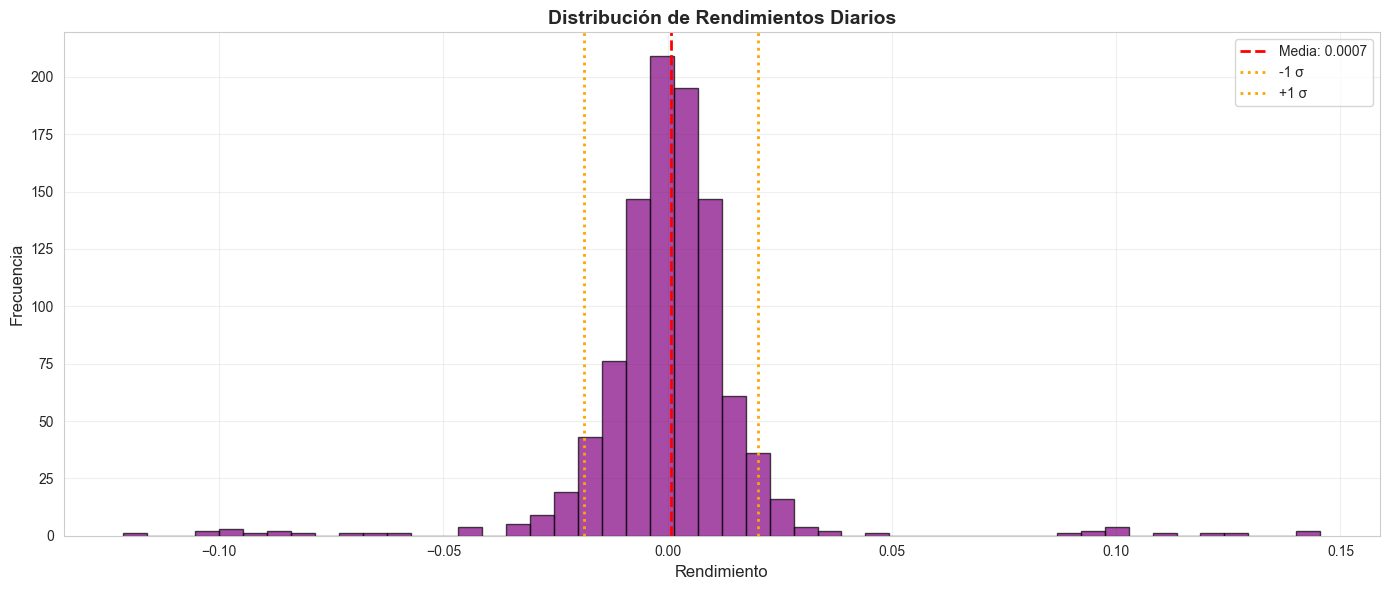

In [14]:
# Gráfico 3: Distribución de Rendimientos
plt.figure(figsize=(14, 6))
plt.hist(df['Rendimiento'].dropna(), bins=50, edgecolor='black', alpha=0.7, color='purple')
plt.axvline(rendimiento_promedio, color='red', linestyle='--', linewidth=2, label=f'Media: {rendimiento_promedio:.4f}')
plt.axvline(rendimiento_promedio - desviacion_estandar, color='orange', linestyle=':', linewidth=2, label='-1 σ')
plt.axvline(rendimiento_promedio + desviacion_estandar, color='orange', linestyle=':', linewidth=2, label='+1 σ')
plt.xlabel('Rendimiento', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.title('Distribución de Rendimientos Diarios', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

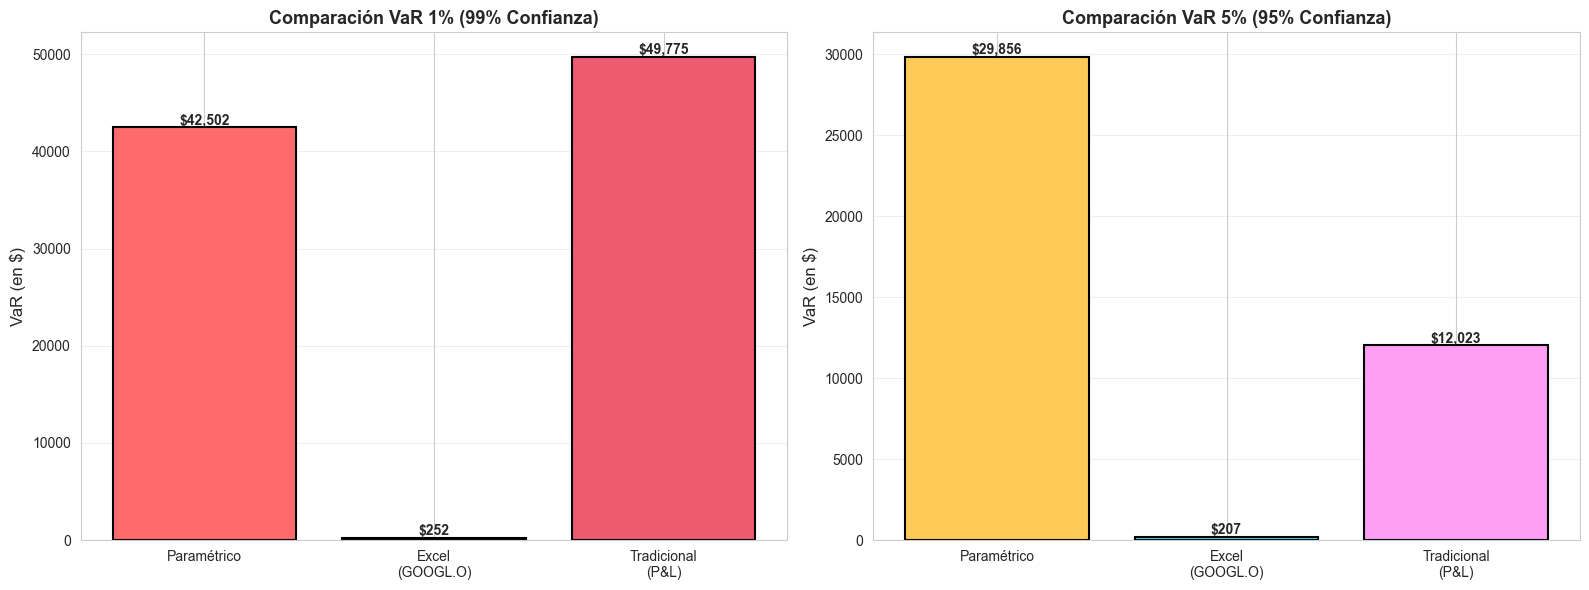

📊 Observa las diferencias significativas entre los métodos:
   • Método Excel: Solo considera precio de GOOGL.O
   • Método Tradicional: Considera pérdidas reales del portafolio completo


In [31]:
# Gráfico 4: Comparación VaR - Todos los métodos
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# 1% VaR
metodos_1 = ['Paramétrico', 'Excel\n(GOOGL.O)', 'Tradicional\n(P&L)']
valores_1 = [abs(VaR_parametrico_1pct), VaR_no_parametrico_1pct_excel, abs(VaR_no_parametrico_1pct_tradicional)]
colores_1 = ['#ff6b6b', '#4ecdc4', '#ee5a6f']

bars1 = ax1.bar(metodos_1, valores_1, color=colores_1, edgecolor='black', linewidth=1.5)
ax1.set_ylabel('VaR (en $)', fontsize=12)
ax1.set_title('Comparación VaR 1% (99% Confianza)', fontsize=13, fontweight='bold')
ax1.grid(True, alpha=0.3, axis='y')

# Añadir valores en las barras
for bar, valor in zip(bars1, valores_1):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
             f'${valor:,.0f}',
             ha='center', va='bottom', fontsize=10, fontweight='bold')

# 5% VaR
metodos_2 = ['Paramétrico', 'Excel\n(GOOGL.O)', 'Tradicional\n(P&L)']
valores_2 = [abs(VaR_parametrico_5pct), VaR_no_parametrico_5pct_excel, abs(VaR_no_parametrico_5pct_tradicional)]
colores_2 = ['#feca57', '#48dbfb', '#ff9ff3']

bars2 = ax2.bar(metodos_2, valores_2, color=colores_2, edgecolor='black', linewidth=1.5)
ax2.set_ylabel('VaR (en $)', fontsize=12)
ax2.set_title('Comparación VaR 5% (95% Confianza)', fontsize=13, fontweight='bold')
ax2.grid(True, alpha=0.3, axis='y')

# Añadir valores en las barras
for bar, valor in zip(bars2, valores_2):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
             f'${valor:,.0f}',
             ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

print("📊 Observa las diferencias significativas entre los métodos:")
print("   • Método Excel: Solo considera precio de GOOGL.O")
print("   • Método Tradicional: Considera pérdidas reales del portafolio completo")

## 10. Resumen Final del DataFrame

In [20]:
# Mostrar las columnas calculadas
columnas_mostrar = ['Date', 'Día', 'V0', 'P&L', 'Ranked_P&L', 'Rendimiento']
print("DataFrame con todas las columnas calculadas:")
print(df[columnas_mostrar].head(15))

print(f"\nForma del DataFrame: {df.shape}")
print(f"Columnas totales: {len(df.columns)}")
print(f"\nColumnas disponibles:")
print(df.columns.tolist())

DataFrame con todas las columnas calculadas:
          Date  Día           V0         P&L  Ranked_P&L  Rendimiento
0   2025-11-04    1  953355.1700 -22511.1600        19.0    -0.023068
1   2025-11-03    2  975866.3300   4485.7218       726.0     0.004618
2   2025-10-31    3  971380.6082  -2880.9018       294.0    -0.002957
3   2025-10-30    4  974261.5100  -8369.6497        97.0    -0.008518
4   2025-10-29    5  982631.1597   1072.6556       537.0     0.001093
5   2025-10-28    6  981558.5041   8340.4312       882.0     0.008570
6   2025-10-27    7  973218.0729  12143.7500       956.0     0.012636
7   2025-10-24    8  961074.3229   6198.2613       819.0     0.006491
8   2025-10-23    9  954876.0616  20135.0716       984.0     0.021541
9   2025-10-22   10  934740.9900  -3728.5325       249.0    -0.003973
10  2025-10-21   11  938469.5225 -13170.8216        44.0    -0.013840
11  2025-10-20   12  951640.3441  17566.7782       980.0     0.018807
12  2025-10-17   13  934073.5659  -2786.7344 

## 11. Resumen Ejecutivo

In [32]:
print("="*70)
print(" "*20 + "RESUMEN EJECUTIVO - ANÁLISIS DE RIESGO")
print("="*70)

print("\n📊 COMPOSICIÓN DEL PORTAFOLIO:")
print("-" * 70)
total_acciones = sum(acciones.values())
for empresa, num_acciones in sorted(acciones.items(), key=lambda x: x[1], reverse=True):
    if empresa in df.columns:
        valor_actual = df[empresa].iloc[0] * num_acciones
        porcentaje = (valor_actual / V0_hoy) * 100
        print(f"  {empresa:15} | {num_acciones:5} acciones | ${valor_actual:12,.2f} | {porcentaje:5.2f}%")

print(f"\n  {'TOTAL':15} | {total_acciones:5} acciones | ${V0_hoy:12,.2f} | 100.00%")

print("\n\n📈 MÉTRICAS DE RENDIMIENTO:")
print("-" * 70)
print(f"  Rendimiento Promedio Diario:    {rendimiento_promedio*100:.4f}%")
print(f"  Desviación Estándar:             {desviacion_estandar*100:.4f}%")
print(f"  Rendimiento Anualizado:          {rendimiento_promedio*252*100:.2f}%")
print(f"  Volatilidad Anualizada:          {desviacion_estandar*np.sqrt(252)*100:.2f}%")

print("\n\n⚠️  VaR PARAMÉTRICO (1 día):")
print("-" * 70)
print(f"  Confianza 99% (1% VaR):          ${abs(VaR_parametrico_1pct):,.2f} ({abs(VaR_parametrico_1pct)/V0_hoy*100:.2f}%)")
print(f"  Confianza 95% (5% VaR):          ${abs(VaR_parametrico_5pct):,.2f} ({abs(VaR_parametrico_5pct)/V0_hoy*100:.2f}%)")

print("\n\n⚠️  VaR NO PARAMÉTRICO - MÉTODO EXCEL (GOOGL.O):")
print("-" * 70)
print(f"  Confianza 99% (1% VaR):          ${VaR_no_parametrico_1pct_excel:,.2f} ({VaR_no_parametrico_1pct_excel/V0_hoy*100:.2f}%)")
print(f"  Confianza 95% (5% VaR):          ${VaR_no_parametrico_5pct_excel:,.2f} ({VaR_no_parametrico_5pct_excel/V0_hoy*100:.2f}%)")
print(f"  ⚠️  Solo mide precio de GOOGL.O, no el riesgo del portafolio completo")

print("\n\n⚠️  VaR NO PARAMÉTRICO - MÉTODO TRADICIONAL (P&L):")
print("-" * 70)
print(f"  Confianza 99% (1% VaR):          ${abs(VaR_no_parametrico_1pct_tradicional):,.2f} ({abs(VaR_no_parametrico_1pct_tradicional)/V0_hoy*100:.2f}%)")
print(f"  Confianza 95% (5% VaR):          ${abs(VaR_no_parametrico_5pct_tradicional):,.2f} ({abs(VaR_no_parametrico_5pct_tradicional)/V0_hoy*100:.2f}%)")
print(f"  ✅ Mide el riesgo real del portafolio completo")

print("\n\n💡 INTERPRETACIÓN:")
print("-" * 70)
print(f"  Con 99% de confianza (método tradicional P&L), la pérdida máxima")
print(f"  esperada en 1 día no debería exceder ${abs(VaR_no_parametrico_1pct_tradicional):,.2f}")
print(f"\n  El método paramétrico estima ${abs(VaR_parametrico_1pct):,.2f}")
print(f"\n  ⚠️  El método Excel (${VaR_no_parametrico_1pct_excel:,.2f}) no es representativo")
print(f"  del riesgo del portafolio - solo mide el precio de una acción.")
print("\n" + "="*70)

                    RESUMEN EJECUTIVO - ANÁLISIS DE RIESGO

📊 COMPOSICIÓN DEL PORTAFOLIO:
----------------------------------------------------------------------
  FEIM.OQ         |  1544 acciones | $   52,449.68 |  5.50%
  INTC.O          |  1436 acciones | $   53,175.08 |  5.58%
  VLO             |   639 acciones | $  108,061.29 | 11.33%
  NVDA.O          |   592 acciones | $  117,624.48 | 12.34%
  BA              |   432 acciones | $   85,557.60 |  8.97%
  SIEGn.DE        |   369 acciones | $   90,109.80 |  9.45%
  JPM             |   341 acciones | $  105,454.25 | 11.06%
  GOOGL.O         |   223 acciones | $   61,891.42 |  6.49%
  LMT             |   217 acciones | $  105,240.66 | 11.04%
  MSFT.O          |   200 acciones | $  102,866.00 | 10.79%
  MU.O            |   163 acciones | $   35,538.89 |  3.73%
  XAU= (BID)      |     9 acciones | $   35,386.02 |  3.71%

  TOTAL           |  6165 acciones | $  953,355.17 | 100.00%


📈 MÉTRICAS DE RENDIMIENTO:
----------------------------